In [1]:
#Rod Ta
#11/6/17

In [2]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
#from graphviz import Digraph  

In [3]:
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
def make_meshgrid(x, y, h=.01):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

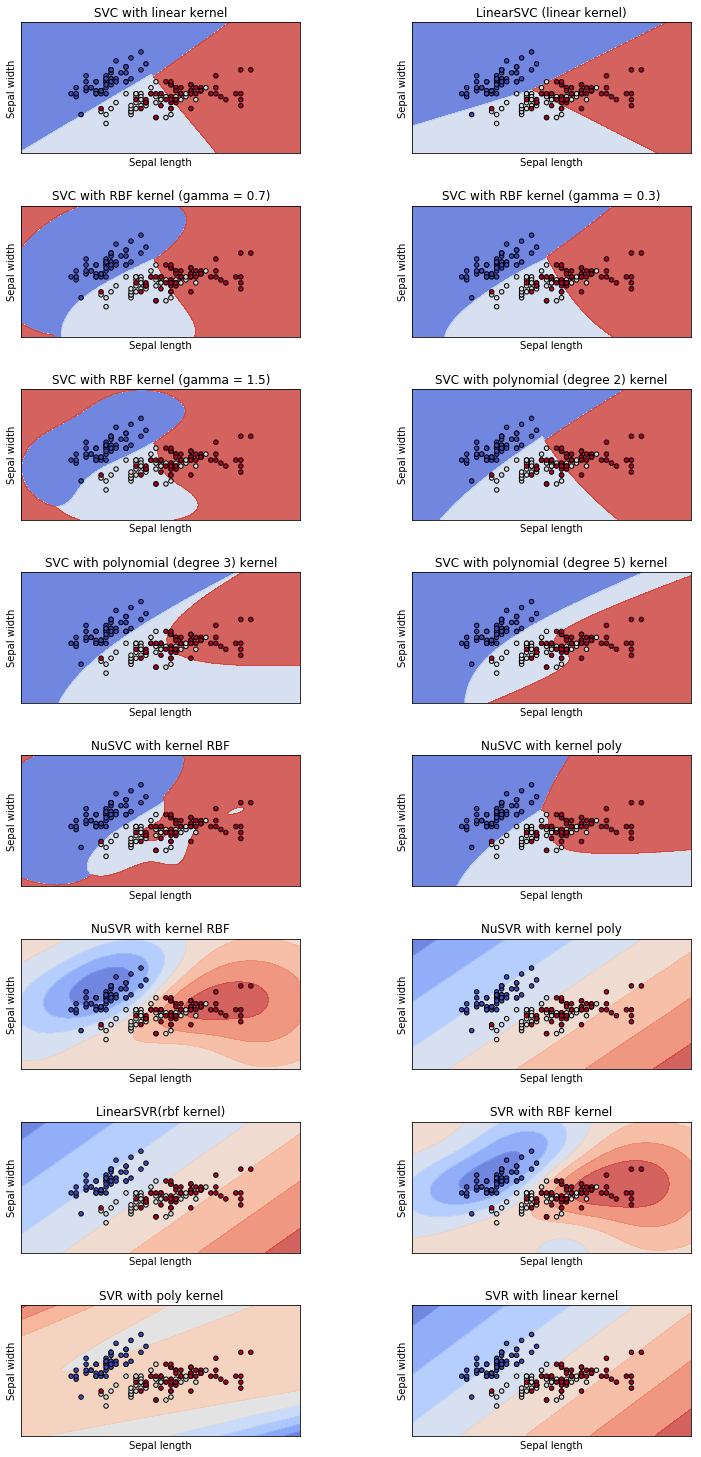

In [5]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='rbf', gamma=0.3, C=C),
          svm.SVC(kernel='rbf', gamma=1.5, C=C),
          svm.SVC(kernel='poly', degree=2, C=C),
          svm.SVC(kernel='poly', degree=3, C=C),
          svm.SVC(kernel='poly', degree=5, C=C),
          svm.NuSVC(),
          svm.NuSVC(kernel='poly'),
          svm.NuSVR(),
          svm.NuSVR(kernel='linear'),
          svm.LinearSVR(C=C),
          svm.SVR(kernel='rbf', C=C),
          svm.SVR(kernel='poly', C=C),
          svm.SVR(kernel='linear', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel (gamma = 0.7)',
          'SVC with RBF kernel (gamma = 0.3)',
          'SVC with RBF kernel (gamma = 1.5)',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 5) kernel',
          'NuSVC with kernel RBF',
          'NuSVC with kernel poly',
          'NuSVR with kernel RBF',
          'NuSVR with kernel poly',
          'LinearSVR(rbf kernel)',
          'SVR with RBF kernel',
          'SVR with poly kernel',
          'SVR with linear kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(nrows=8, ncols=2, figsize= (12,26))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

accuracy = []

for clf, title, ax in zip(models, titles, sub.flatten()):
    accuracy.append(np.around(clf.score(X,y),decimals =5))
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [6]:
for i in range(0,len(accuracy)):
        print (titles[i],": ",accuracy[i])

SVC with linear kernel :  0.82
LinearSVC (linear kernel) :  0.8
SVC with RBF kernel (gamma = 0.7) :  0.82667
SVC with RBF kernel (gamma = 0.3) :  0.82667
SVC with RBF kernel (gamma = 1.5) :  0.82667
SVC with polynomial (degree 2) kernel :  0.82
SVC with polynomial (degree 3) kernel :  0.81333
SVC with polynomial (degree 5) kernel :  0.81333
NuSVC with kernel RBF :  0.78
NuSVC with kernel poly :  0.8
NuSVR with kernel RBF :  0.77713
NuSVR with kernel poly :  0.72506
LinearSVR(rbf kernel) :  0.72356
SVR with RBF kernel :  0.77336
SVR with poly kernel :  0.73971
SVR with linear kernel :  0.71974


In [7]:
'''

Experimenting with different SVM kernels showed very interesting results.

I computed and showed the accuracy for each of the different SVM kernels I experimented with, and the accuracy all
hovers around .72 to .83

What really caught my eyes are the results of 'SVC with RBF kernel' and 'SVC with polynomial kernel'.

Starting with SVC with RBF kernel, I used three different gamma values of 0.3, 0.7, and 1.5. The charts showed very 
different ways of classification for each of the different gamma values. Once I computed the accuracy for each one, 
they all had identical accuracy of .82667

Moving onto SVC with polynomial kernel, I used three different degrees of 2,3 and 5. The charts showed a very different
way of classification, but all of their accuracy are almost identical at 0.81 to 0.82

Overall, these different SVM kernels I experimented with did fairly well at the iris classifications.


'''

"\n\nExperimenting with different SVM kernels showed very interesting results.\n\nI computed and showed the accuracy for each of the different SVM kernels I experimented with, and the accuracy all\nhovers around .72 to .83\n\nWhat really caught my eyes are the results of 'SVC with RBF kernel' and 'SVC with polynomial kernel'.\n\nStarting with SVC with RBF kernel, I used three different gamma values of 0.3, 0.7, and 1.5. The charts showed very \ndifferent ways of classification for each of the different gamma values. Once I computed the accuracy for each one, \nthey all had identical accuracy of .82667\n\nMoving onto SVC with polynomial kernel, I used three different degrees of 2,3 and 5. The charts showed a very different\nway of classification, but all of their accuracy are almost identical at 0.81 to 0.82\n\nOverall, these different SVM kernels I experimented with did fairly well at the iris classifications.\n\n\n"